In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,SimpleRNN,Embedding,Flatten
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Data
train_df = pd.read_csv('train.csv', encoding='latin1')
test_df = pd.read_csv('test.csv', encoding='latin1')

In [3]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [6]:
train_df['text'].fillna('',inplace=True)
test_df['text'].fillna('',inplace=True)

In [7]:
# map positive to 1, negative to 0, replaces missing values with 2
train_df['sentiment'] = train_df['sentiment'].map({'positive': 1, 'negative': 0}).fillna(2).astype(int)
test_df['sentiment'] = test_df['sentiment'].map({'positive': 1, 'negative': 0}).fillna(2).astype(int)

In [8]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",2,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,0,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,0,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,0,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",0,noon,60-70,Angola,32866272,1246700.0,26


In [9]:
# Splitting the data
X_train = np.array(train_df['text'].tolist())
y_train = np.array(train_df['sentiment'].tolist())
X_test = np.array(test_df['text'].tolist())
y_test = np.array(test_df['sentiment'].tolist())

In [10]:
# one-hot encoding with 3 classes
y_train = to_categorical(y_train, 3)
y_test = to_categorical(y_test, 3)

In [11]:
# Initializing a Tokenizer with vocab size of 20000 words and converting the text data to integers
tokenizer = Tokenizer(num_words=20000)

tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [12]:
X_train = pad_sequences(X_train, padding='post', maxlen=30)
X_test = pad_sequences(X_test, padding='post', maxlen=30)

In [13]:
X_train.shape

(27481, 30)

In [14]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=5, input_length=30))
model.add(SimpleRNN(32,return_sequences=False))
model.add(Dense(3,activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4589 - loss: 1.0340 - val_accuracy: 0.7099 - val_loss: 0.8228
Epoch 2/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6755 - loss: 0.7591 - val_accuracy: 0.7329 - val_loss: 0.6989
Epoch 3/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7613 - loss: 0.6080 - val_accuracy: 0.7364 - val_loss: 0.6738
Epoch 4/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8065 - loss: 0.5115 - val_accuracy: 0.7306 - val_loss: 0.6909
Epoch 5/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8462 - loss: 0.4247 - val_accuracy: 0.7381 - val_loss: 0.6885
Epoch 6/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8670 - loss: 0.3698 - val_accuracy: 0.7450 - val_loss: 0.7333
Epoch 7/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8940 - loss: 0.3131 - val_accuracy: 0.7232 - val_loss: 0.7631
Epoch 8/10
859/859 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9058 - loss: 0.2764 - val_accuracy: 0.

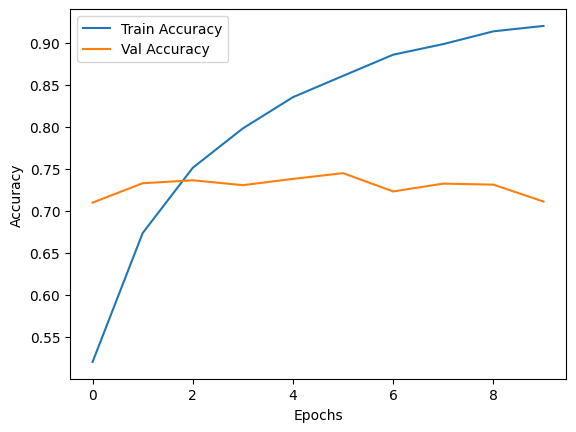

In [17]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [18]:
print(f"Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")

Training Accuracy: 0.9203
Validation Accuracy: 0.7111
